In [1]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

导入必要的包

In [3]:
def synthetic_data(w, b, num_example):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
feature, labels = synthetic_data(true_w, true_b, 1000)


In [4]:
print('features:', feature[0], '\nlabel:', labels[0])

features: tensor([-0.0728, -0.9539]) 
label: tensor([7.2977])


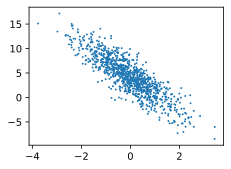

In [10]:
d2l.set_figsize()
d2l.plt.scatter(feature[:, 1].detach().numpy(), 
               labels.detach().numpy(), 1);

In [26]:
def data_iter(batch_size, feature, labels):
    num_examples = len(feature)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield feature[batch_indices], labels[batch_indices]
        # yield: 不断返回，直到全部完成为止

batch_size = 10
for X, y in data_iter(batch_size, feature, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1106,  2.2721],
        [-0.4149, -0.4020],
        [ 1.2632, -2.3530],
        [-2.5721,  0.7059],
        [ 0.9163, -2.1391],
        [ 0.8662, -0.9046],
        [-0.1019,  2.3805],
        [-0.7020, -0.0469],
        [-1.7382,  0.3490],
        [ 0.5859,  0.5577]]) 
 tensor([[-3.3134],
        [ 4.7322],
        [14.7209],
        [-3.3436],
        [13.3077],
        [ 9.0147],
        [-4.0916],
        [ 2.9545],
        [-0.4696],
        [ 3.4802]])


In [27]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad = True)
b = torch. zeros(1, requires_grad = True)

In [28]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [29]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2
# 损失函数没有求均值，所以后面sgd的时候要除以batch_size

In [30]:
def sgd(params, lr, batch_size):
    with torch.no_grad():  # 更新的时候不需要梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

前面实现了各个模块，现在开始训练

In [32]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, feature, labels):
        l = loss(net(X, w, b), y)  # 把X，w，b放入network预测， 和y比较获得loss
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(feature, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029827
epoch 2, loss 0.000110
epoch 3, loss 0.000053


In [35]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')
print('b', b, '\nw', w)

w的估计误差：tensor([ 0.0007, -0.0005], grad_fn=<SubBackward0>)
b的估计误差：tensor([2.8133e-05], grad_fn=<RsubBackward1>)
b tensor([4.2000], requires_grad=True) 
w tensor([[ 1.9993],
        [-3.3995]], requires_grad=True)
